<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork1005-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# Application Programming Interface


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Create and Use APIs in Python



### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API  


## Table of Contents
<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Pandas is an API</a></li>
<li><a href="#ref1">REST APIs Basics  </a></li>
<li><a href="#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [2]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance
!pip install --upgrade nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.7.0
    Uninstalling nbformat-5.7.0:
      Successfully uninstalled nbformat-5.7.0


<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [4]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

You create a dictionary, this is just data.


In [5]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [6]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width="800," align="center" alt="logistic regression block diagram">


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.




In [7]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [8]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


Rest API’s function by sending a request,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In cryptocurrency a popular method to display the movements of the price of a currency.

![Example Candlestick Graph](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/candlestick.png)

Here is a description of the candle sticks.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/explanation.png" alt="Candle Stick Definition" width="800" height="600">

In this lab, we will be using the <a href=https://www.coingecko.com/en/api?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork1005-2022-01-01>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


Lets start off by getting the data we need. Using the <code>get_coin_market_chart_by_id(id, vs_currency, days)</code>. <code>id</code> is the name of the coin you want, <code>vs_currency</code> is the currency you want the price in, and <code>days</code> is how many days back from today you want.


In [9]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [12]:
type(bitcoin_data )



dict

The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.


In [13]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1675126917864, 22804.227960910157],
 [1675130588166, 22846.489641552773],
 [1675134132834, 22883.917526440302],
 [1675137776158, 22866.810029812365],
 [1675141244129, 22866.339986749175]]

Finally lets turn this data into a Pandas DataFrame.


In [16]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])
#data

Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.


In [18]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))
data

,TimeStamp,Price,date
0,1675126917864,22804.227961,2023-01-31
1,1675130588166,22846.489642,2023-01-31
2,1675134132834,22883.917526,2023-01-31
3,1675137776158,22866.810030,2023-01-31
4,1675141244129,22866.339987,2023-01-31
...,...,...,...
717,1677704504133,23427.883714,2023-03-01
718,1677708026131,23576.425430,2023-03-01
719,1677711698443,23504.747683,2023-03-01
720,1677715324609,23634.333489,2023-03-02


Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.


In [19]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})
candlestick_data

date         Price                                          
                         min           max         first          last
0   2023-01-31  22783.222755  23189.694720  22804.227961  23021.203330
1   2023-02-01  22980.516633  23723.290222  23137.323554  23708.528154
2   2023-02-02  23584.484146  24182.858615  23725.161796  23644.899710
3   2023-02-03  23353.764868  23652.415674  23519.655156  23412.276206
4   2023-02-04  23304.928359  23498.984032  23438.134391  23415.291170
5   2023-02-05  22878.854159  23398.869246  23339.608294  22988.253154
6   2023-02-06  22742.644242  23060.400193  22947.523793  22906.739698
7   2023-02-07  22786.483006  23610.185929  22786.483006  23205.900533
8   2023-02-08  22871.103325  23310.172649  23259.399425  22957.553733
9   2023-02-09  21844.198228  23009.061325  22947.507829  21844.198228
10  2023-02-10  21499.661732  21958.603366  21809.953941  21518.879041
11  2023-02-11  21643.699159  21851.016108  21643.699159  21851.016108
12  2023-02-12  21792.247987  22077.091347  21889.579131  21829.311446
13  2023-02-13  21470.742475  21899.570907  21779.874404  21654.221682
14  2023-02-14  21687.029688  22275.827533  21807.834275  22201.004921
15  2023-02-15  22096.144734  24122.186290  22220.070997  24104.328600
16  2023-02-16  23949.132669  24960.697616  24307.875102  23949.132669
17  2023-02-17  23666.448646  24783.677812  23756.907282  24597.101700
18  2023-02-18  24485.686700  24695.038684  24628.824552  24614.831210
19  2023-02-19  24447.433278  24941.421349  24635.850030  24480.533434
20  2023-02-20  24228.784427  24972.047000  24322.563258  24694.998348
21  2023-02-21  24216.199315  24982.455935  24791.174738  24370.932551
22  2023-02-22  23688.237676  24417.387036  24417.387036  24090.251961
23  2023-02-23  23807.757151  24631.747484  24146.101365  23807.757151
24  2023-02-24  23095.189801  24021.954249  23951.110984  23095.189801
25  2023-02-25  22932.896357  23202.430487  23172.286538  23140.355653
26  2023-02-26  23109.274125  23669.063540  23167.204864  23443.161513
27  2023-02-27  23225.092570  23757.151327  23541.115854  23498.790808
28  2023-02-28  23063.293817  23525.715579  23518.123906  23159.646637
29  2023-03-01  23079.254559  23829.946744  23155.543747  23504.747683
30  2023-03-02  23634.333489  23647.874390  23634.333489  23647.874390

Finally we are now ready to use plotly to create our Candlestick Chart.


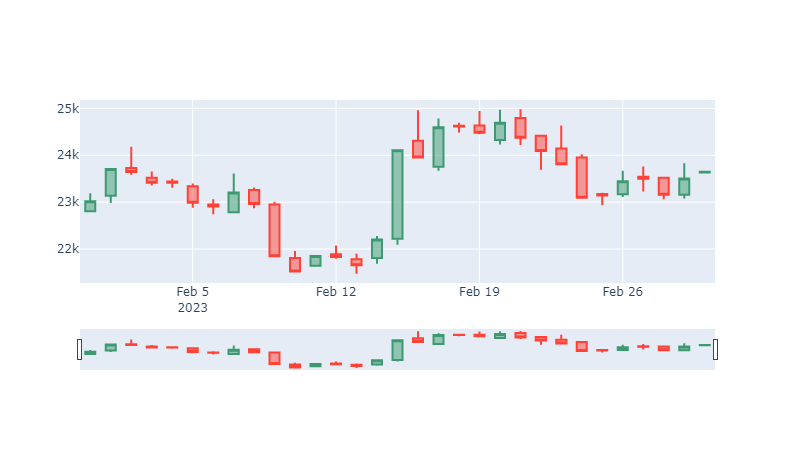

In [27]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                                    open=candlestick_data['Price']['first'], 
                                    high=candlestick_data['Price']['max'],
                                    low=candlestick_data['Price']['min'], 
                                    close=candlestick_data['Price']['last'])
                    ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## Authors:   


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-11-23 | 3.0 | Azim Hirjani | New API |
| 2020-09-09 | 2.1 | Malika Singla | Spell Check |
| 2020-08-26  | 2.0  | Lavanya | Moved lab to course repo in GitLab |
|   |   |   |   |




<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
